# Import Libraries & Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Data Summaries

## Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## Stat Summary

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


## Missing Values

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

## Duplicates

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop('Id', inplace = True, axis =1)

In [8]:
df['acid_ratio'] = df['volatile acidity'] / df['fixed acidity']

# Correlation Heatmap

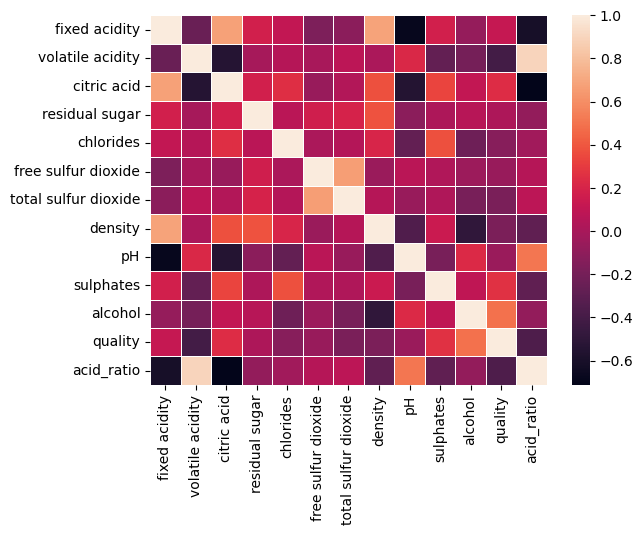

In [9]:
sns.heatmap(df.corr(),linecolor='white',linewidths=.4)
plt.show()

In [10]:
correlation_df = df.corr()
correlation_df['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
acid_ratio             -0.358429
volatile acidity       -0.407394
Name: quality, dtype: float64

# Pairplot

In [ ]:
sns.pairplot(df)

In [12]:
df['quality'] = df['quality'].astype('category')

# Count Plot for Response Var

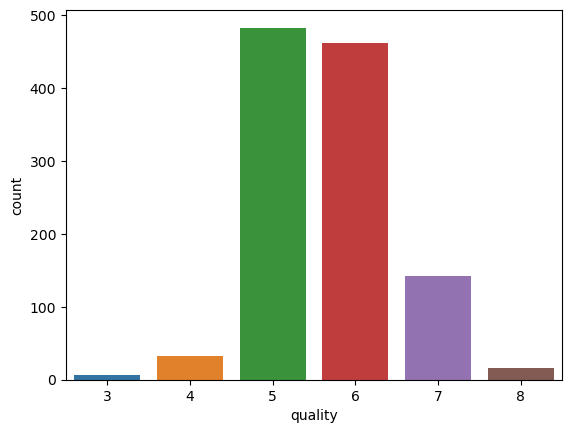

In [13]:
sns.countplot(data = df, x= 'quality')
plt.show()

# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('quality', axis=1)
#X = df[['alcohol','fixed acidity','density','pH','volatile acidity']]
y = df['quality']  # Single column target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=12)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 12, k_neighbors = 3)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Random Forest - Grid Search

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = {
    'n_estimators':[10,50,100,200,300],
    'max_depth':[None, 10,20,30],
    'criterion':['gini','entropy','log_loss']
}

grid_search = GridSearchCV(rf, param_grid, cv = 3, n_jobs =-1, verbose =2)

grid_search.fit(X_train_resampled, y_train_resampled)

print('Best Params', grid_search.best_params_)
print('Best Cross-val Score', grid_search.best_score_)

test_score = grid_search.score(X_test_scaled, y_test)
print('Test Score', test_score)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best Params {'criterion': 'gini', 'max_depth': None, 'n_estimators': 300}
Best Cross-val Score 0.8574950690335306
Test Score 0.6180758017492711


In [17]:
rfmodel = RandomForestClassifier(n_estimators=300, max_depth=None, criterion='gini')

rffit = rfmodel.fit(X_train_resampled, y_train_resampled)

rfpred = rffit.predict(X_test_scaled)

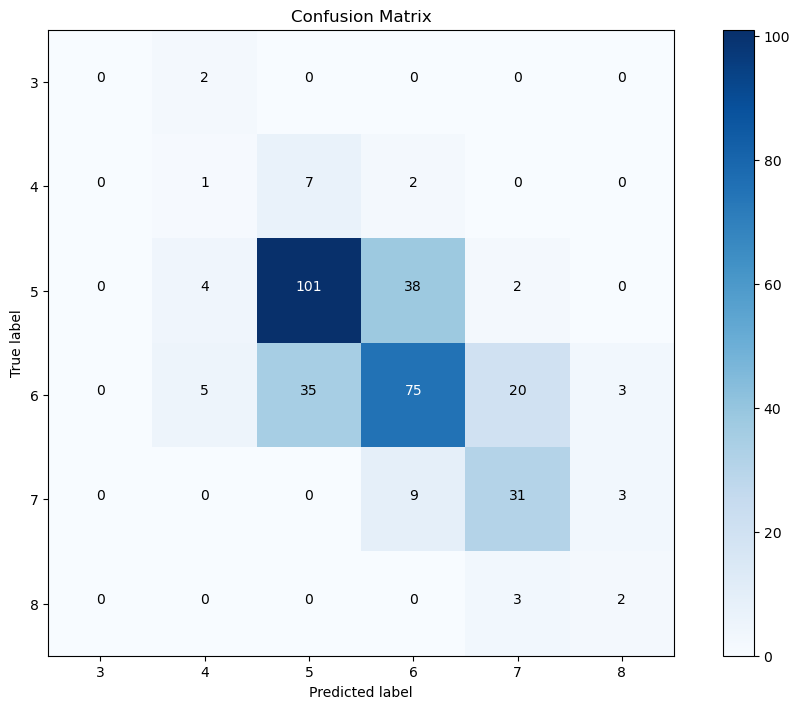

In [18]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, rfpred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Get class names if y_test contains labels, or generate integer labels
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Include annotations
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [24]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, rfpred)

print('Accuracy', accuracy)
report = classification_report(y_test, rfpred, zero_division=1)
print(report)

Accuracy 0.6122448979591837
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       0.08      0.10      0.09        10
           5       0.71      0.70      0.70       145
           6       0.60      0.54      0.57       138
           7       0.55      0.72      0.63        43
           8       0.25      0.40      0.31         5

    accuracy                           0.61       343
   macro avg       0.53      0.41      0.38       343
weighted avg       0.62      0.61      0.61       343



# KNN

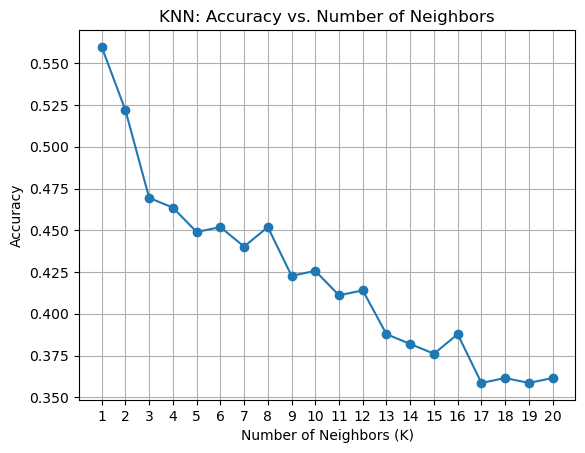

In [20]:
from sklearn.neighbors import KNeighborsClassifier

k_values = []
accuracy_values = []
k_range = range(1,21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_resampled, y_train_resampled)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    k_values.append(k)
    accuracy_values.append(accuracy)

plt.plot(k_values, accuracy_values, marker = 'o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs. Number of Neighbors')
plt.xticks(k_range)
plt.grid()
plt.show()


Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.08      0.20      0.11        10
           5       0.60      0.68      0.64       145
           6       0.57      0.37      0.45       138
           7       0.50      0.63      0.56        43
           8       0.11      0.20      0.14         5

    accuracy                           0.52       343
   macro avg       0.31      0.35      0.32       343
weighted avg       0.55      0.52      0.53       343



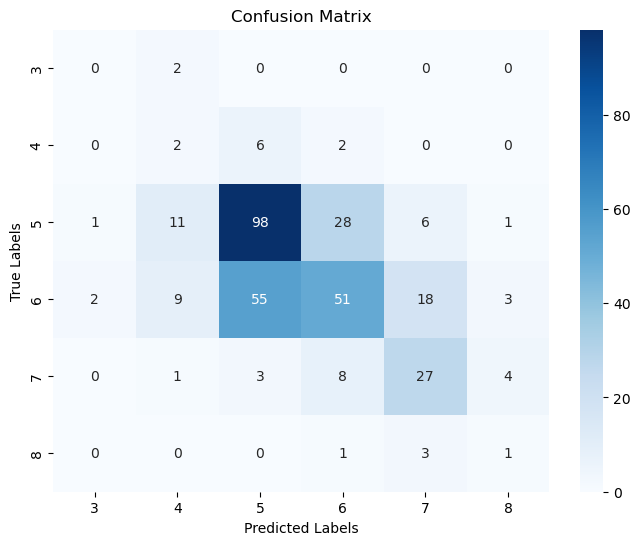

In [21]:
# knn 
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train_resampled, y_train_resampled)

y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred)
print('\nClassification Report:', '\n',report)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()